# Introduction to the `Network` object

In [1]:
from pycomplexnet import Network
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

## Example 1

A star non-directed network.

In [2]:
net_1 = Network.from_pandas(pd.DataFrame({
    'from':[1,2,7,2,4,2,6,2,3,2,9,2,5,2,8,2],
    'to':  [2,1,2,7,2,4,2,6,2,3,2,9,2,5,2,8]
}))

In [3]:
net_1.node_labels

{0: 1, 1: 2, 2: 7, 3: 4, 4: 6, 5: 3, 6: 9, 7: 5, 8: 8}

In [4]:
net_1.toarray()

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.]])

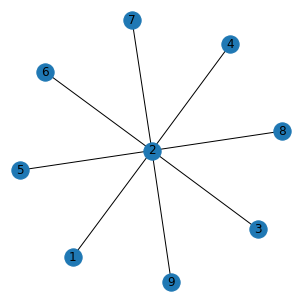

In [5]:
plt.rcParams['figure.figsize'] = (4,4)
G_1 = nx.from_numpy_matrix(
    net_1.adjacency_matrix.toarray()
)
pos_1 = nx.spring_layout(G_1)
# Plot it
nx.draw(G_1, pos_1, with_labels=False)
nx.draw_networkx_labels(
    G_1, pos_1, net_1.node_labels, font_size=12)
plt.show()

### Distances

In [6]:
net_1.get_distance(1,3)

2

In [7]:
net_1.get_distance(1,2)

1

In [8]:
net_1.get_distance(2,2)

0

In [9]:
net_1.get_shortest_paths_by(2,2,2)

(0, 1)

In [10]:
net_1.get_shortest_paths_by(1,1,2)

(inf, 0)

In [11]:
net_1.get_shortest_paths_by(1,2,2)

(1, 1)

In [12]:
net_1.get_shortest_paths_by(1,3,2)

(2, 1)

### Centrality measures

In [13]:
net_1.get_betweeness_centrality(2)

73.0

In [14]:
net_1.get_betweeness_centrality(3)

17.0

In [15]:
net_1.get_closeness_centrality(2)

1.125

In [16]:
net_1.get_closeness_centrality(3)

0.6

## Example 2

In [17]:
net_2 = Network.from_pandas(pd.DataFrame({
    'from':[1,2,1,4,2,5,3,4,4,5],
    'to':  [2,1,4,1,5,2,4,3,5,4]
}))

In [18]:
net_2.node_labels

{0: 1, 1: 2, 2: 4, 3: 5, 4: 3}

In [19]:
net_2.toarray()

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 1.],
       [0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

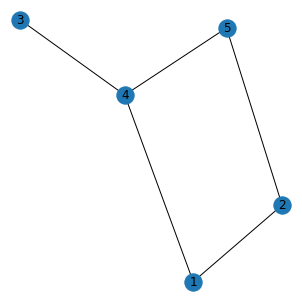

In [20]:
plt.rcParams['figure.figsize'] = (4,4)
G_2 = nx.from_numpy_matrix(
    net_2.adjacency_matrix.toarray()
)
pos_2 = nx.spring_layout(G_2)
# Plot it
nx.draw(G_2, pos_2, with_labels=False)
nx.draw_networkx_labels(
    G_2, pos_2, net_2.node_labels, font_size=12)
plt.show()

In [21]:
net_2.get_betweeness_centrality(2)

10.0

In [22]:
net_2.get_betweeness_centrality(3)

9.0

In [23]:
net_2.get_closeness_centrality(2)

0.7142857142857143

In [25]:
net_2.get_closeness_centrality(3)

0.625

## Example 3

In [26]:
net_3 = Network.from_pandas(
    pd.DataFrame({
        'from':['A','B','C','C','A','C','C','D','A'],
        'to':  ['B','C','B','A','C','D','E','E','D']
    })
)

In [27]:
net_3.node_labels

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}

In [28]:
net_3.toarray()

array([[0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 1., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

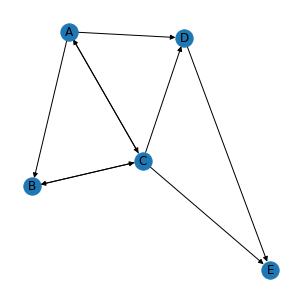

In [29]:
plt.rcParams['figure.figsize'] = (4,4)
G_3 = nx.from_numpy_matrix(net_3.adjacency_matrix.toarray(), create_using=nx.DiGraph)
pos_3 = nx.spring_layout(G_3)
# Plot it
nx.draw(G_3, pos_3, with_labels=False)
nx.draw_networkx_labels(G_3, pos_3, net_3.node_labels, font_size=12)
plt.show()

In [30]:
net_3.get_num_triangles(['A','B','C','D','E'])

[1, 1, 1, 0, 0]

In [31]:
net_3.get_distance('A','E')

2

In [32]:
net_3.get_shortest_paths('A','E')

(2, 2)

In [33]:
net_3.get_shortest_paths_by('A','E','C')

(2, 1)

In [34]:
net_3.get_betweeness_centrality('A')

7.0

In [35]:
net_3.get_betweeness_centrality('C')

10.5

In [36]:
net_3.get_betweeness_centrality('D')

5.5

In [37]:
net_3.get_closeness_centrality('C')

1.25

In [38]:
net_3.get_closeness_centrality('D')

0.0

In [39]:
net_3.get_closeness_centrality('A')

1.0